<a href="https://colab.research.google.com/github/ManishSuhas0026/Reinforcement-Learning/blob/main/530_RL_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NonstationaryBandit:
    def __init__(self, n_arms, initial_means, volatility):
        self.n_arms = n_arms
        self.means = np.array(initial_means)
        self.volatility = volatility

    def step(self):
        noise = np.random.normal(0, self.volatility, self.n_arms)
        self.means += noise

    def get_reward(self, action):
        reward = np.random.normal(self.means[action], 1.0)
        return reward

In [3]:
class NonstationaryBanditSolver:
    def __init__(self, bandit, epsilon=0.1, alpha=0.1):
        self.bandit = bandit
        self.epsilon = epsilon
        self.alpha = alpha
        self.q_values = np.zeros(bandit.n_arms)  # Estimated value for each action
        self.action_counts = np.zeros(bandit.n_arms)  # Count of times each action was selected

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.bandit.n_arms)
        else:
            return np.argmax(self.q_values)

    def update_estimates(self, action, reward):
        self.q_values[action] += self.alpha * (reward - self.q_values[action])

    def run(self, steps):
        rewards = []
        actions = []

        for _ in range(steps):
            action = self.select_action()
            reward = self.bandit.get_reward(action)

            self.update_estimates(action, reward)
            self.bandit.step()  # Update the underlying reward distribution

            rewards.append(reward)
            actions.append(action)

        return rewards, actions

In [4]:
n_arms = 5
initial_means = [1.0, 1.5, 2.0, 2.5, 3.0]
volatility = 0.1
epsilon = 0.1
alpha = 0.1
steps = 1000

bandit = NonstationaryBandit(n_arms, initial_means, volatility)
solver = NonstationaryBanditSolver(bandit, epsilon, alpha)

rewards, actions = solver.run(steps)

print(f"Total Reward: {sum(rewards)}")
print(f"Average Reward: {np.mean(rewards)}")

Total Reward: 3072.3545095279683
Average Reward: 3.0723545095279716


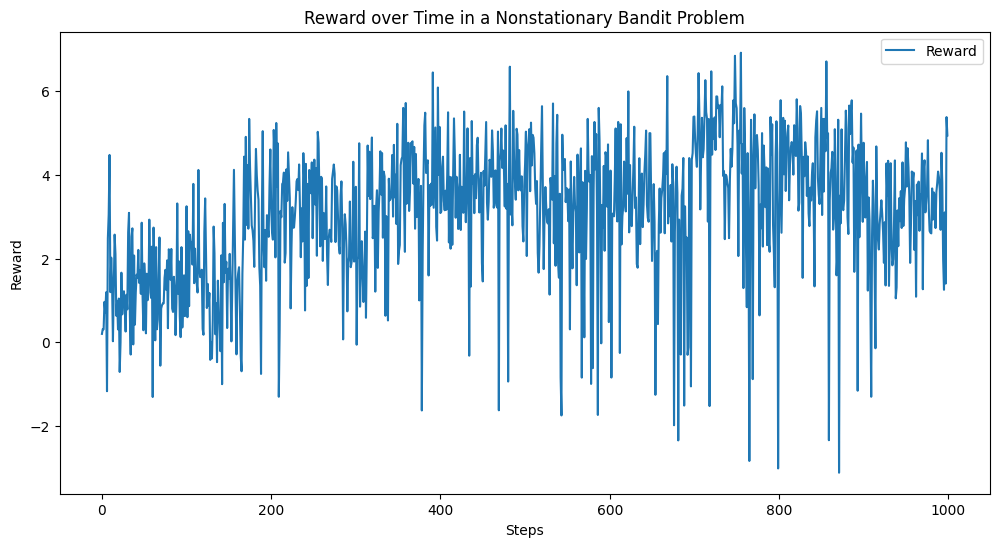

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(rewards, label='Reward')
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward over Time in a Nonstationary Bandit Problem")
plt.legend()
plt.show()